In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dftrain = pd.read_csv('train.csv')
dftest = pd.read_csv('test.csv')

In [269]:
Xtrain = dftrain.loc[:,'MSSubClass':'SaleCondition']
Xtrain.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [270]:
Ytrain = pd.DataFrame(dftrain['SalePrice'])
Ytrain.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [271]:
Xtest = dftest.loc[:,'MSSubClass':'SaleCondition']

In [272]:
Xall = pd.concat([Xtrain,Xtest])
Xall = Xall.reset_index(drop=True)

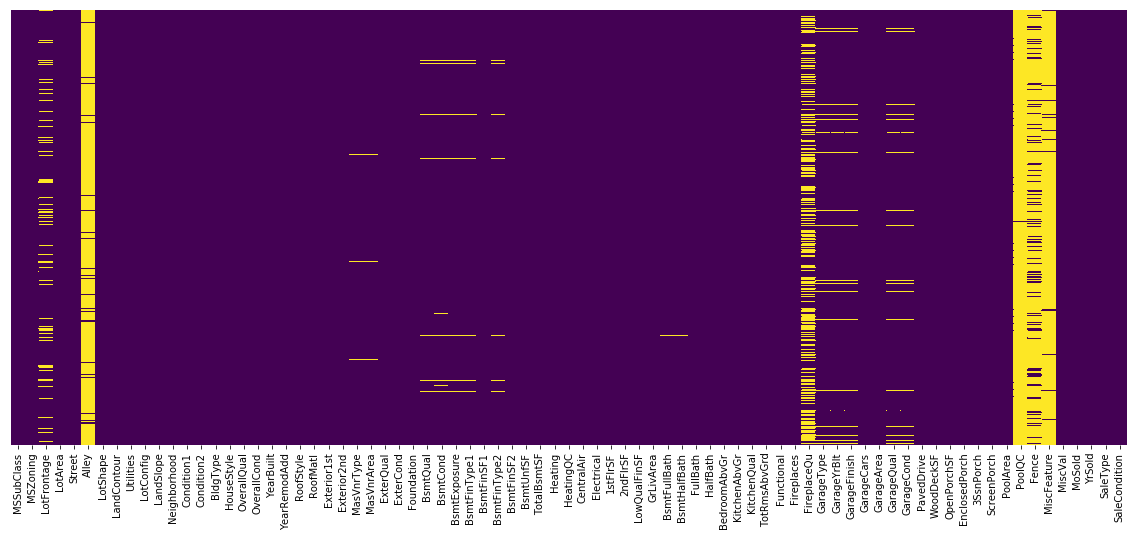

In [273]:
plt.figure(figsize=(20,8))
sns.heatmap(Xall.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [274]:
Xall.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'],axis=1,inplace=True)

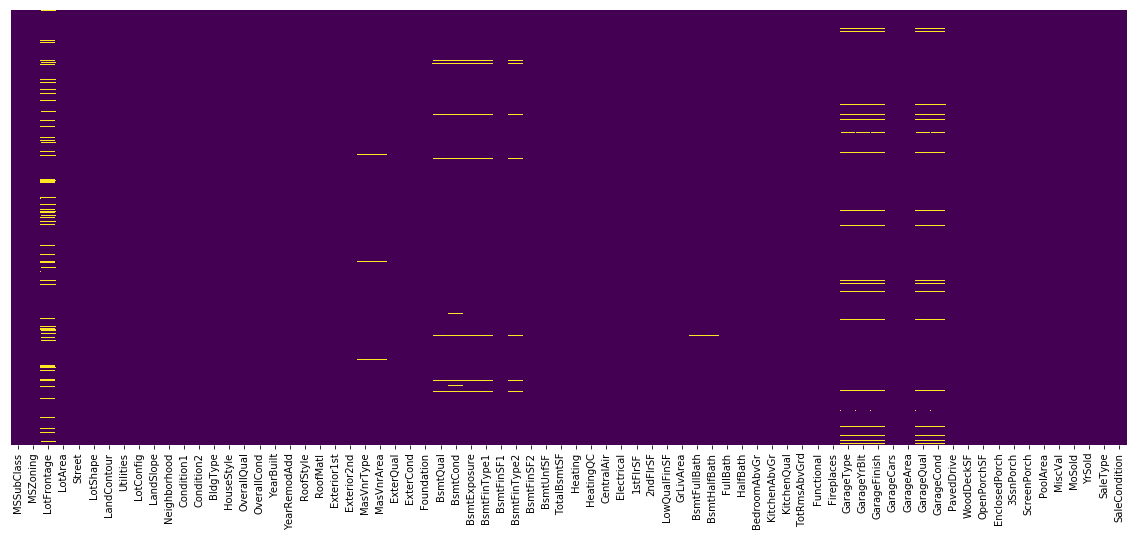

In [275]:
plt.figure(figsize=(20,8))
sns.heatmap(Xall.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [276]:
Xall = Xall.fillna(Xtrain.mean())

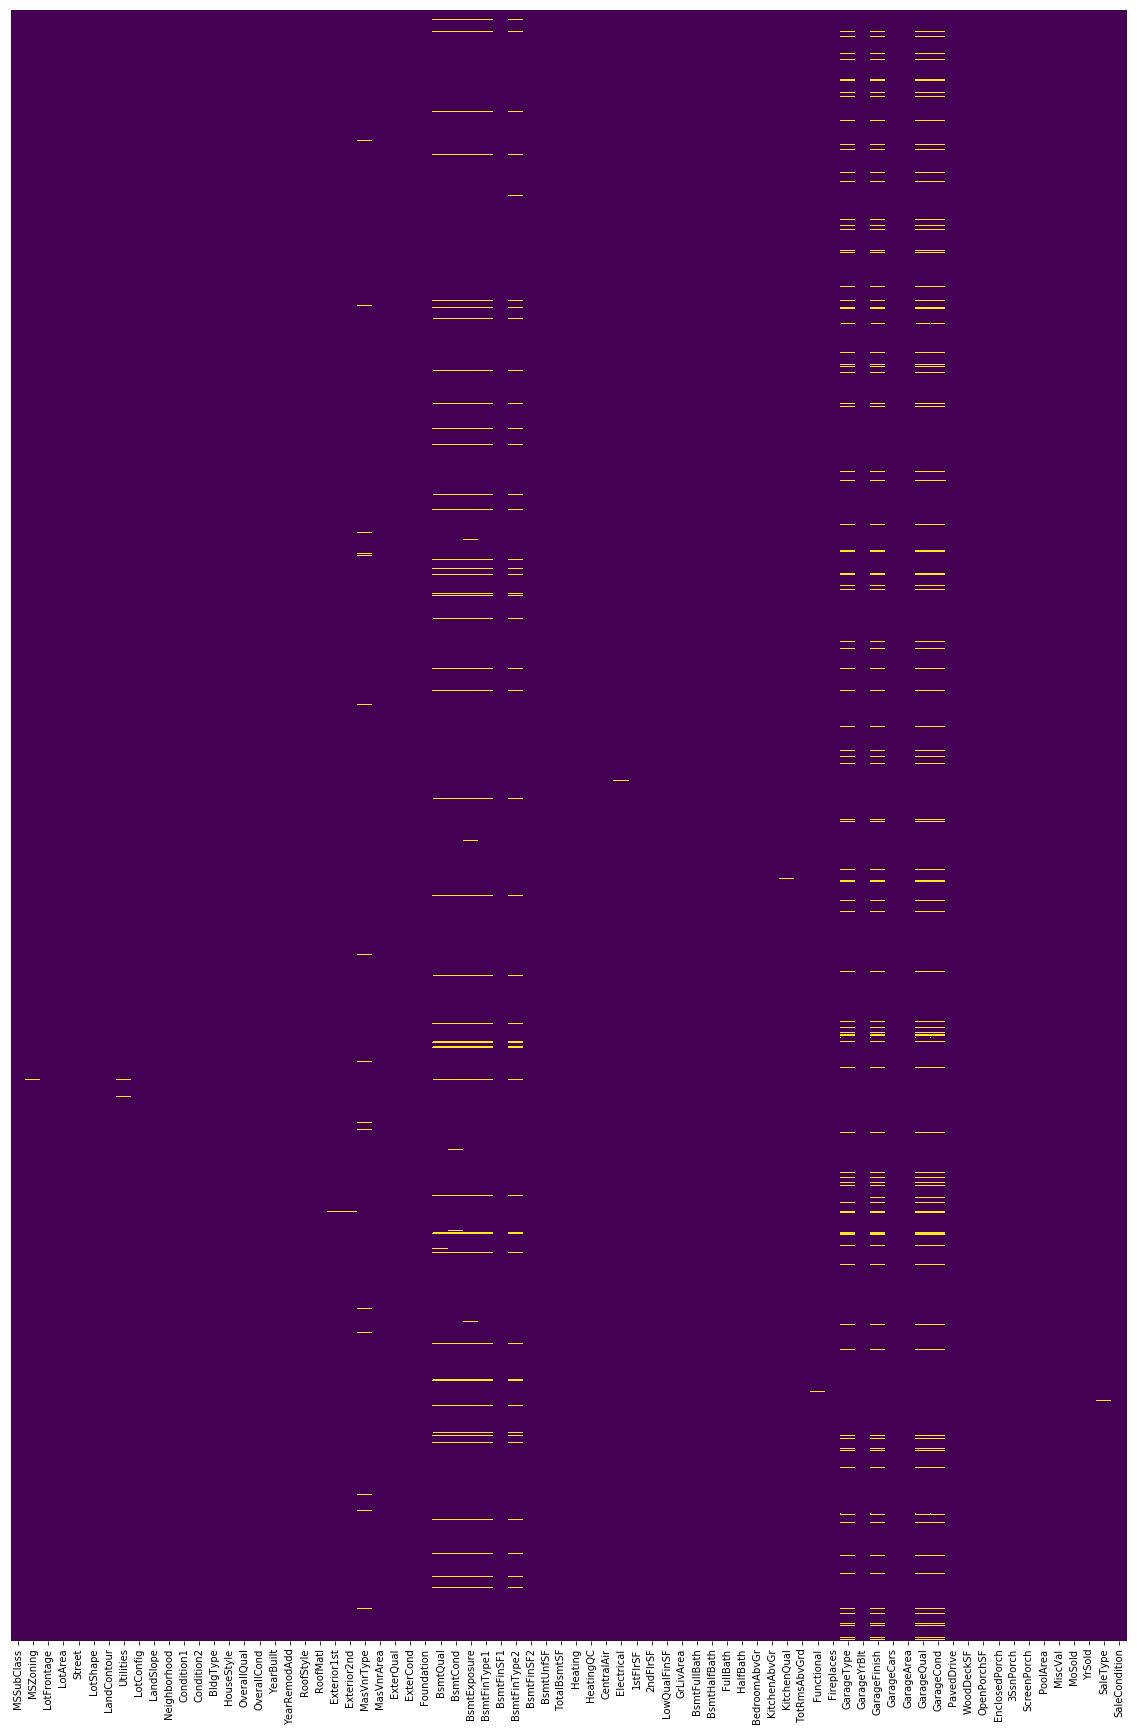

In [277]:
plt.figure(figsize=(20,30))
sns.heatmap(Xall.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [278]:
tmpD = Xall.isnull().sum(axis=0)
cols = list(tmpD[tmpD>0].index)
dic = {}

for var in cols:
    dic[var] = (Xall[var].value_counts().index[0],Xall[var].value_counts().max())
    ind = Xall.isnull()[var][Xall.isnull()[var]].index
#     print(dic[var][0])
    Xall.loc[ind,var] = dic[var][0]
    print(var,end=' ')
    print(dic[var])


MSZoning ('RL', 2265)
Utilities ('AllPub', 2916)
Exterior1st ('VinylSd', 1025)
Exterior2nd ('VinylSd', 1014)
MasVnrType ('None', 1742)
BsmtQual ('TA', 1283)
BsmtCond ('TA', 2606)
BsmtExposure ('No', 1904)
BsmtFinType1 ('Unf', 851)
BsmtFinType2 ('Unf', 2493)
Electrical ('SBrkr', 2671)
KitchenQual ('TA', 1492)
Functional ('Typ', 2717)
GarageType ('Attchd', 1723)
GarageFinish ('Unf', 1230)
GarageQual ('TA', 2604)
GarageCond ('TA', 2654)
SaleType ('WD', 2525)


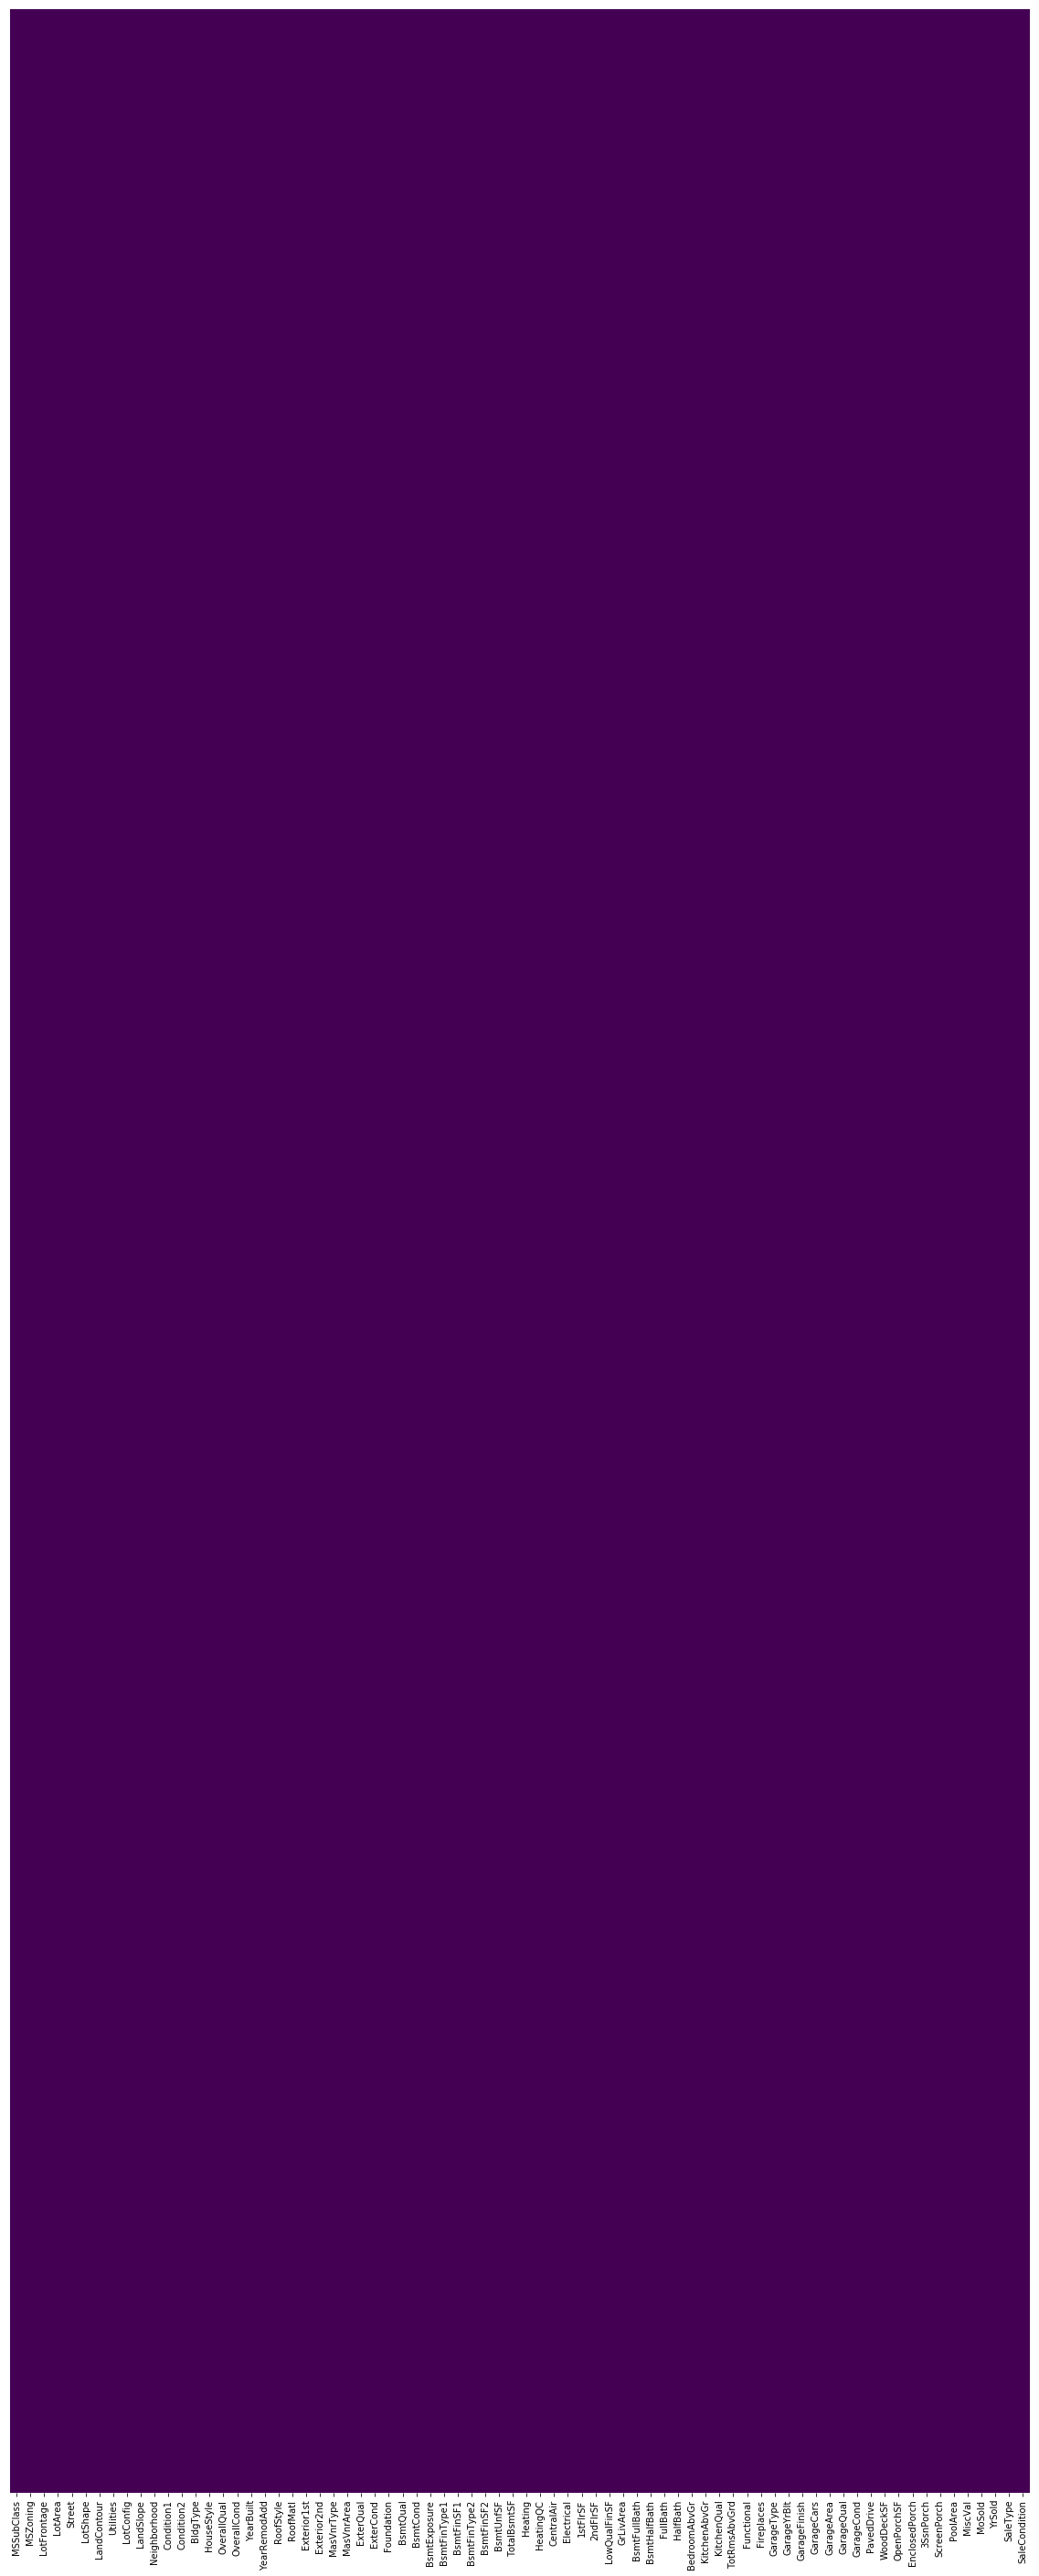

In [279]:
plt.figure(figsize=(20,50))
sns.heatmap(Xall.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [281]:
# list2 = list((Xall).columns)
categories = pd.get_dummies(Xall.select_dtypes(exclude=['floating','integer']))
XallNumeric = Xall.select_dtypes(include=['floating','integer'])
Xall2 = pd.concat([XallNumeric,categories],axis=1)

In [282]:
Xtrain2 = Xall2.iloc[Xtrain.index]
Xtest2 = Xall2.iloc[(Xtrain.index[-1]+1):]

In [239]:
from sklearn.linear_model import LinearRegression

In [240]:
model = LinearRegression()

In [241]:
model.fit(Xtrain2,Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [244]:
pred = model.predict(Xtest2)

In [245]:
pred

array([[ 112974.5087732 ],
       [ 161403.16243361],
       [ 189441.1577622 ],
       ..., 
       [ 180455.71305324],
       [ 105037.52865872],
       [ 221195.79065511]])

In [246]:
predTrain = model.predict(Xtrain2)

In [247]:
predTrain

array([[ 206574.17002611],
       [ 207163.06581402],
       [ 206050.00579413],
       ..., 
       [ 275750.79047516],
       [ 140833.3510531 ],
       [ 148502.0404104 ]])

In [248]:
from sklearn.metrics import mean_squared_error

In [539]:
np.sqrt(mean_squared_error(Ytrain.as_matrix(),predTrain))

20942.649217816332

# Creat data cleaning function

In [3]:
def DataConv(dftrain,dftest):
    # storing value in Xtrain variables
    Xtrain = dftrain.loc[:,'MSSubClass':'SaleCondition']
    Ytrain = pd.DataFrame(dftrain['SalePrice'])
    Xtest = dftest.loc[:,'MSSubClass':'SaleCondition']
    
    # combining all dataframes in a signle dataframe
    Xall = pd.concat([Xtrain,Xtest])
    Xall = Xall.reset_index(drop=True)
    
    # dropping highly missing feature columns
    Xall.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'],axis=1,inplace=True)
    
    # filling missing numerical data with their repective means
    Xall = Xall.fillna(Xtrain.mean())
    
    # filling the missing categorical data with their median
    tmpD = Xall.isnull().sum(axis=0)
    cols = list(tmpD[tmpD>0].index)
    dic = {}
    for var in cols:
        dic[var] = (Xall[var].value_counts().index[0],Xall[var].value_counts().max())
        ind = Xall.isnull()[var][Xall.isnull()[var]].index
        Xall.loc[ind,var] = dic[var][0]
    
    # creating categorical data features
    categories = pd.get_dummies(Xall.select_dtypes(exclude=['floating','integer']))
    XallNumeric = Xall.select_dtypes(include=['floating','integer'])
    Xall = pd.concat([XallNumeric,categories],axis=1)
    
    # seperating train and test data
    Xtrain = Xall.iloc[Xtrain.index]
    Xtest = Xall.iloc[(Xtrain.index[-1]+1):]
    
    return (Xtrain,Ytrain,Xtest)

In [4]:
(Xtrain,Ytrain,Xtest) = DataConv(dftrain,dftest)

In [542]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(Xtrain2,Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [543]:
pred = model.predict(Xtrain)

In [544]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(Ytrain.as_matrix(),pred))

20942.649217816332

In [9]:
from sklearn.model_selection import train_test_split

In [445]:
X_train, X_test, y_train, y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [446]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [447]:
model.score(X_test,y_test)

0.88173192925040866

In [448]:
from sklearn.linear_model import Ridge

In [449]:
# alphas = 1/(10**np.arange(1,4))
alphas = np.array([0.001,0.005,0.01,0.05,0.1])
errors = []
for alpha in alphas:
    modelRidge = Ridge(alpha=alpha)
    modelRidge.fit(X_train,y_train)
    pred = modelRidge.predict(X_test)
    err = np.sqrt(mean_squared_error(y_test.as_matrix(),pred))
    errors.append(err)

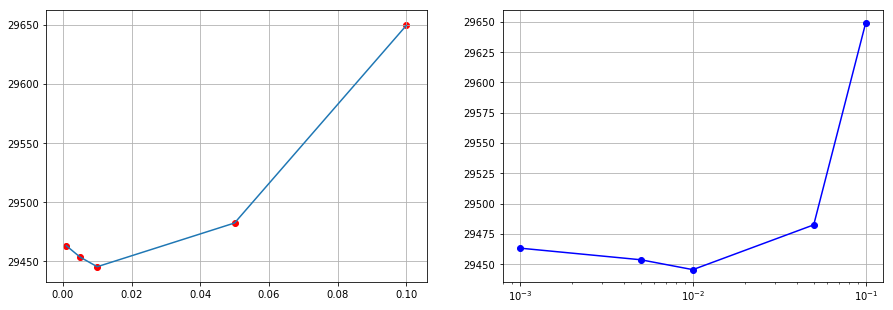

In [450]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(alphas,errors)
plt.scatter(alphas,errors,c='r')
plt.grid()
plt.subplot(1,2,2)
plt.semilogx(alphas,errors,linestyle='-', marker='o', color='b')
plt.grid()

In [351]:
print(0.01/(10**np.arange(1,5)))

[  1.00000000e-03   1.00000000e-04   1.00000000e-05   1.00000000e-06]


In [367]:
1/(10**np.arange(1,4))

array([ 0.1  ,  0.01 ,  0.001])

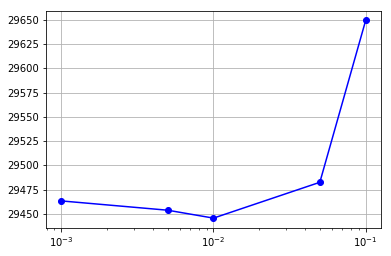

In [375]:
plt.semilogx(alphas,errors,linestyle='-', marker='o', color='b')
plt.grid()

In [10]:
def DataConvPoly(dftrain,dftest,order=1):
    # storing value in Xtrain variables
    Xtrain = dftrain.loc[:,'MSSubClass':'SaleCondition']
    Ytrain = pd.DataFrame(dftrain['SalePrice'])
    Xtest = dftest.loc[:,'MSSubClass':'SaleCondition']
    
    # combining all dataframes in a signle dataframe
    Xall = pd.concat([Xtrain,Xtest])
    Xall = Xall.reset_index(drop=True)
    
    # dropping highly missing feature columns
    Xall.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'],axis=1,inplace=True)
    
    # filling missing numerical data with their repective means
    Xall = Xall.fillna(Xtrain.mean())
    
    # filling the missing categorical data with their median
    tmpD = Xall.isnull().sum(axis=0)
    cols = list(tmpD[tmpD>0].index)
    dic = {}
    for var in cols:
        dic[var] = (Xall[var].value_counts().index[0],Xall[var].value_counts().max())
        ind = Xall.isnull()[var][Xall.isnull()[var]].index
        Xall.loc[ind,var] = dic[var][0]
    
    # poly features
    from sklearn.preprocessing import PolynomialFeatures
    modelPoly = PolynomialFeatures(degree=order)
    XallPoly = modelPoly.fit_transform(Xall.select_dtypes(include=['floating','integer']))[:,1:]
#     print(np.isnan(XallPoly.std(axis=0).reshape(1,XallPoly.shape[1])).sum())
    print(XallPoly.mean(axis=0).reshape(1,XallPoly.shape[1]))
    XallPoly = (XallPoly-XallPoly.mean(axis=0).reshape(1,XallPoly.shape[1]))/XallPoly.std(axis=0).reshape(1,XallPoly.shape[1])
    print(XallPoly.std(axis=0).reshape(1,XallPoly.shape[1]))
    
    
    # creating categorical data features
    categories = pd.get_dummies(Xall.select_dtypes(exclude=['floating','integer']))
    XallNumeric = pd.DataFrame(XallPoly)
    Xall = pd.concat([XallNumeric,categories],axis=1)
    
    # seperating train and test data
    Xtrain = Xall.iloc[Xtrain.index]
    Xtest = Xall.iloc[(Xtrain.index[-1]+1):]
    
    return (Xtrain,Ytrain,Xtest)

In [11]:
(Xtrain,Ytrain,Xtest) = DataConvPoly(dftrain,dftest,order=2)
X_train, X_test, y_train, y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

/Users/aabuaish/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in true_divide


In [12]:
from sklearn.linear_model import Lasso

In [13]:
alphas = 1/(10**np.arange(2,6))
errors = []
for alpha in alphas:
    modelLasso = Lasso(alpha=alpha)
    modelLasso.fit(X_train,y_train)
    pred = modelLasso.predict(X_test)
    err = np.sqrt(mean_squared_error(y_test.as_matrix(),pred))
    errors.append(err)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

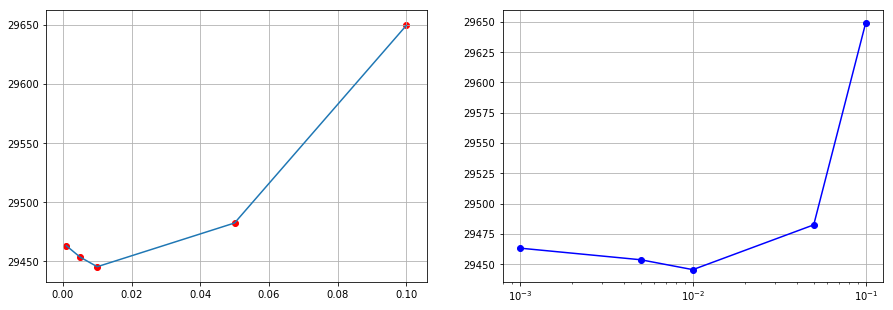

In [460]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(alphas,errors)
plt.scatter(alphas,errors,c='r')
plt.grid()
plt.subplot(1,2,2)
plt.semilogx(alphas,errors,linestyle='-', marker='o', color='b')
plt.grid()

In [395]:
dummy=np.random.randn(2,3)
dummy

array([[ 0.33314533,  0.99512376, -0.26433964],
       [-0.09641319,  0.49919461,  1.00290121]])

In [396]:
dummy[:,1:]

array([[ 0.99512376, -0.26433964],
       [ 0.49919461,  1.00290121]])

In [399]:
from sklearn.preprocessing import PolynomialFeatures

In [400]:
pd.DataFrame(dummy)

,0,1,2
0,0.333145,0.995124,-0.264340
1,-0.096413,0.499195,1.002901


In [402]:
mm = PolynomialFeatures(degree=2)

In [407]:
xx = mm.fit_transform(pd.DataFrame(dummy))

In [408]:
xx

array([[ 1.        ,  0.33314533,  0.99512376, -0.26433964,  0.11098581,
         0.33152083, -0.08806352,  0.9902713 , -0.26305066,  0.06987544],
       [ 1.        , -0.09641319,  0.49919461,  1.00290121,  0.0092955 ,
        -0.04812895, -0.09669291,  0.24919526,  0.50064288,  1.00581083]])

In [412]:
pd.DataFrame(xx,columns=['a b c d e f g h i j'.split(' ')])

,a,b,c,d,e,f,g,h,i,j
0,1.0,0.333145,0.995124,-0.264340,0.110986,0.331521,-0.088064,0.990271,-0.263051,0.069875
1,1.0,-0.096413,0.499195,1.002901,0.009296,-0.048129,-0.096693,0.249195,0.500643,1.005811


In [417]:
# concatenating matrices
xx = np.int64(np.random.randn(2,3)*10)
yy = np.int64(np.random.randn(2,2)*10)
print(xx)
print(yy)

[[-24 -19   3]
 [ 26   3  -5]]
[[-2 -5]
 [12 -7]]


In [418]:
np.concatenate((xx,yy),axis=1)

array([[-24, -19,   3,  -2,  -5],
       [ 26,   3,  -5,  12,  -7]])

In [472]:
xx

array([[-24, -19,   3],
       [ 26,   3,  -5]])

In [482]:
xx.mean(axis=0)

array([ 1., -8., -1.])

In [483]:
xx.std(axis=0)

array([ 25.,  11.,   4.])

In [485]:
(xx-xx.mean(axis=0))/xx.std(axis=0)

array([[-1., -1.,  1.],
       [ 1.,  1., -1.]])